In [174]:
import pandas as pd # it's about to RAM
import numpy as np
import matplotlib.pyplot as plt

n_turns=60

load the data first

In [175]:
def get_byz(df):
    byz = [_ for _ in range(1,101,1)]
    healthy_nodes = set(df.Id)
    for node in healthy_nodes:
        byz.remove(node)
    return byz # a byz node logs nothing, unlike a healthy node
def process_one_iter(df, n_byz, n_nodes=100):
    discovery_df = df[df.Age>=0]
    byz = get_byz(df)
    byz_prop = {}

   
    views = [[set() for turn in range(n_turns+1)]  for i in range(n_nodes+1)]
    for turn in range(n_turns+1):
        turn_df = df[df['Turn']==turn]
        byz_prop[turn]=[]
        #print(byz_prop)
        for i in range(1,n_nodes+1):
            view = views[i][turn]
            node_df = turn_df[turn_df['Id']==i]
            [(view.add(_)) for _ in node_df['Node']]
            byz_cnt = len([node for node in view if node in byz])
            if len(view)>0:
                byz_prop[turn].append(byz_cnt/len(view))
    byz_prop = [np.mean(byz_prop[_]) for _ in range(n_turns+1)]

    return byz_prop

def get_results(n_byz, n_nodes=100):
    global_byz_prop = [0 for _ in range(n_turns+1)]
    its = [1,2,3,4,5]
    for it in its:
        print(it)
        tmp_df = pd.read_csv(f'./measures-2/log_byz_part{it}/log_byz_{n_byz}_perc.csv') 
        
        byz_prop = process_one_iter(tmp_df, n_nodes, int(n_byz))
        
        global_byz_prop = [sum(t) for t in zip(global_byz_prop, byz_prop)]
    
    global_byz_prop = [rate/len(its) for rate in global_byz_prop]
    return global_byz_prop

save/load res for saving time

In [ ]:
# import pickle

# # with open("res.pickle", "wb") as tf:
# #     pickle.dump(res,tf, protocol=pickle.HIGHEST_PROTOCOL)
# with open("res.pickle", "rb") as tf:
#     res = pickle.load(tf)

compute the results from the logs

In [ ]:
#n_nodes = 100
# n_byz = 5
# #it=1
# tmp_df = pd.read_csv(f'./measures-2/log_byz_{n_byz}_perc.csv')         
# byz_prop = process_one_iter(tmp_df, n_byz)
# byz_prop

In [177]:
res = {}
for n_byz in ['06','08']+ [_ for _ in range(10,22,2)]+[25,30,40,50]:
    global_byz_prop= get_results(str(n_byz))
    res[str(n_byz)] = global_byz_prop[-1]

1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5


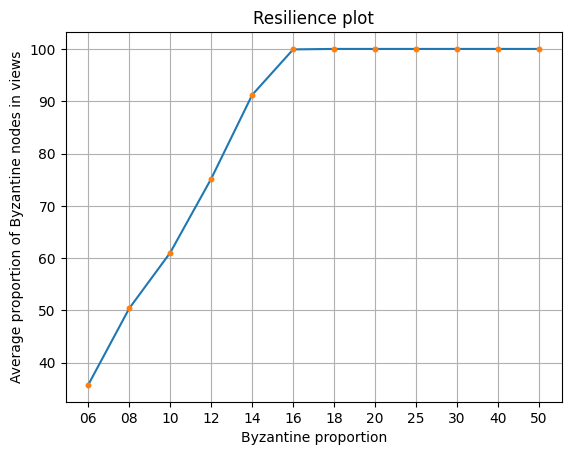

In [178]:

plt.plot(res.keys(), [100*_ for _ in res.values()])
plt.errorbar(res.keys(),  [100*_ for _ in res.values()], yerr=[0 for _ in range(len(res))], fmt="o", markersize=3.25)
plt.title(f"Resilience plot")
# Adding the labels
plt.ylabel("Average proportion of Byzantine nodes in views")
plt.xlabel("Byzantine proportion")
plt.grid(True)

plt.savefig('graphs2/byz.png')
plt.show()

Discovery proportion

In [179]:
n_turns=60
def process_one_iter(df, n_nodes, byz, view_prop=0.15):
    discovery_df = df[df.Age>=0]

    discovery_rates = {}
    discovered_sets = [set() for i in range(n_nodes+1)]
    views = [[set() for turn in range(n_turns+1)]  for i in range(n_nodes+1)]
    for turn in range(n_turns+1):
        turn_df = df[df['Turn']==turn]
        discovery_rates[turn]=[]    
        for i in range(1,n_nodes+1):
            if i not in byz:
                discovered = discovered_sets[i]
                view = views[i][turn]
                node_df = turn_df[turn_df['Id']==i]
                [(discovered.add(_),view.add(_)) for _ in node_df['Node']]
                discovery_rates[turn].append(len(discovered)/n_nodes)
    discovery_rates = [np.mean(discovery_rates[_]) for _ in range(n_turns+1)]
    return discovery_rates

def get_results():
    global_discovery_rates = [0 for _ in range(n_turns+1)] 
    
    for it in [1,2,3,4,5]:
        print(it)
        tmp_df = pd.read_csv(f'./measures-2/log_byz_part{it}/log_byz_{10}_perc.csv') 
        byz = get_byz(tmp_df)
        discovery_rates = process_one_iter(tmp_df, 100, byz)
        
        global_discovery_rates = [sum(t) for t in zip(discovery_rates, global_discovery_rates)]
    
    global_discovery_rates = [rate/5 for rate in global_discovery_rates]

    return global_discovery_rates




In [180]:
res = get_results()

1
2
3
4
5


In [181]:
res

[0.14999999999999997,
 0.20988888888888887,
 0.26408888888888893,
 0.3110444444444445,
 0.35266666666666663,
 0.3854222222222222,
 0.4135777777777777,
 0.4356,
 0.4540444444444445,
 0.46691111111111105,
 0.4779333333333334,
 0.4877111111111111,
 0.4946666666666667,
 0.5014888888888889,
 0.5077111111111111,
 0.5125333333333334,
 0.5168666666666667,
 0.5209999999999999,
 0.5254222222222222,
 0.5296888888888888,
 0.5330222222222223,
 0.5366666666666666,
 0.5400444444444445,
 0.543888888888889,
 0.5478444444444445,
 0.5505333333333333,
 0.5533111111111111,
 0.5564222222222222,
 0.5593333333333333,
 0.5620888888888889,
 0.5653333333333334,
 0.5686,
 0.5719333333333334,
 0.5750222222222222,
 0.5773777777777778,
 0.5798444444444445,
 0.5819333333333333,
 0.5840222222222222,
 0.5858666666666668,
 0.5880444444444444,
 0.5903777777777778,
 0.5924444444444444,
 0.5944222222222222,
 0.5964444444444444,
 0.5985111111111111,
 0.6003111111111111,
 0.6022444444444444,
 0.6040222222222222,
 0.605777777

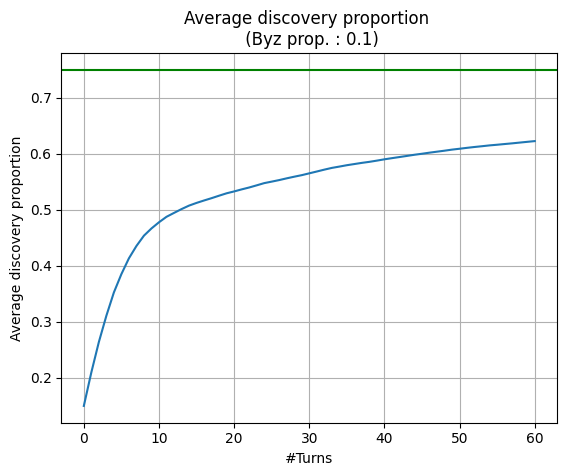

In [182]:
plt.grid(True)
plt.plot([_ for _ in range(n_turns+1)], res)
plt.axhline(y=0.75, color='g', linestyle='-')  

plt.title(f"Average discovery proportion \n (Byz prop. : 0.1)")
plt.ylabel("Average discovery proportion")
plt.xlabel("#Turns")
plt.savefig('graphs2/byz_discov.png')
plt.show()
